# Objective
- base, Grid-Search-CV, Random-Search-CV models without oversampling
- base, Grid-Search-CV, Random-Search-CV models with oversampling

In [ ]:
import warnings
from collections import Counter
from importlib import reload

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from imblearn.over_sampling import SMOTE
from numpy import arange
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier

import custom_libs.evaluation_helper as ev
import models.uci_heart_disease_dataset as uci

warnings.filterwarnings("ignore")

In [ ]:
# Load the preprocessed dataset (299 records; with 14 features).
data = pd.read_csv(uci.UCIHeartDiseaseDataFile.cleveland_preprocessed, names = uci.get_standard_features())
print(f'Data shape: {data.shape}.')
data.head(3)

### Set Hyper-parameters & CV Folds

In [17]:
# Verbose variable for log inspection.
verbose = False

# Dictionary to hold hyperparameters for grid search.
parameters = dict()
parameters['kernel'] = ['rbf', 'poly', 'linear', 'sigmoid']
# Tried even with 30 - takes longer but still chooses 1.
parameters['C'] = arange(1, 10, 1)
parameters['gamma'] = ['scale', 'auto']
parameters['class_weight'] = ['dict', 'balanced']

# A stratified K fold for cross validation strategy - values are assigned from the global class.
skfolds = StratifiedKFold(n_splits = ev.kfold_n_split,
                          shuffle = ev.kfold_shuffle,
                          random_state = ev.random_state)

# Reset accuracies for SVM
ev.accuracies = {}

### Base Model (Function)

In [ ]:
reload(ev)
# A function to build base model.
# Acknowledgement: Code was referenced from Prof. Mafas Raheem's AML lab-8.
def build_and_validate_base_model(x_set, y_set, test_name):
    # Calls the evaluation helper module to Scale and do train/test split.
    x_train, x_test, y_train, y_test = ev.scale_and_split(x_set, y_set)

    print(f'\nEvaluation name: {test_name}.')

    # Train the model with training set.
    knn= KNeighborsClassifier()
    knn.fit(x_train, y_train)

    # Display the best hyperparameters and score.
    print(f'Params         :{ knn.get_params()}.')

    # Do prediction with the train model.
    y_pred = knn.predict(x_test)

    # Calls the evaluation helper module to display classification-report, confusion-matrix and ROC curve
    ev.display_validation_report(y_test, y_pred, x_test, knn, test_name)

### Grid Search CV (Function)

## Evaluation with Standard Dataset (without over-sampling)

### Data Preparation

In [ ]:
# Prepare features and target variables.
X = data.drop(uci.UCIHeartDiseaseData.target, axis=1)
y = data[uci.UCIHeartDiseaseData.target]

In [ ]:
# Evaluation: Standard Base
build_and_validate_base_model(X, y,ev.EvaluationType.std_base)

In [63]:
import numpy as np
from sklearn.model_selection import cross_val_score


def find_optimal_neighbour(x_set, y_set, test_name):
    # Calls the evaluation helper module to Scale and do train/test split.
    x_train, x_test, y_train, y_test = ev.scale_and_split(x_set, y_set)

    print(f'\nEvaluation name: {test_name}.')

    # grid_svc= SVC(verbose=verbose)
    #
    # ## Building Grid Search algorithm with cross-validation and acc score.
    # grid_search_svc = GridSearchCV(grid_svc, parameters, scoring='accuracy', cv=skfolds)
    #
    # # Train and discover the model's hyperparameters for optimal result.
    # grid_search_svc.fit(x_train,y_train)
    #
    # # Display the best hyperparameters and score.
    # print(f'Best params          :{grid_search_svc.best_params_}.')
    # print(f'Best score (*mean)   :{grid_search_svc.best_score_}.')
    #
    # # Predict using the trained model.
    # y_pred = grid_search_svc.predict(x_test)
    #
    # # Calls the evaluation helper module to display classification-report, confusion-matrix and ROC curve
    # ev.display_validation_report(y_test, y_pred, x_test, grid_search_svc, test_name)
    #

    scores = []
    # Create a list of train scores
    train_scores = []

    # Create a list of test scores
    test_scores = []

    # Create a list of different values for n_neighbors
    neighbors = range(1, 21) # 1 to 20

    # Setup algorithm
    knn = KNeighborsClassifier()

    # Loop through different neighbors values
    for k in neighbors:
        knn.set_params(n_neighbors = k) # set neighbors value

        # Fit the algorithm
        knn.fit(x_train, y_train)
        # score = cross_val_score(knn, X, y, cv=skfolds)
        # print(f'score: {score}')
        # scores.append(np.mean(score))
        # y_pred = knn.predict(x_test)

        # ev.display_validation_report(y_test, y_pred, x_test, knn, test_name)

        # Update the training scores
        train_scores.append(knn.score(x_train, y_train))
        #
        # # Update the test scores
        test_scores.append(knn.score(x_test, y_test))
    # sns.lineplot(x = neighbors, y = scores, marker = 'o')
    # plt.xlabel("K Values")
    # plt.ylabel("Accuracy Score")

    print(f'Train scores: {train_scores}.')
    print(f'Test scores : {test_scores}.')


# Evaluation: Standard Grid Search CV
find_optimal_neighbour(X, y, ev.EvaluationType.std_grid_search_cv)


Evaluation name: std-grid-scv.
Train scores: [1.0, 0.8702928870292888, 0.895397489539749, 0.8828451882845189, 0.8577405857740585, 0.8368200836820083, 0.8535564853556485, 0.8451882845188284, 0.8577405857740585, 0.8284518828451883, 0.8577405857740585, 0.8577405857740585, 0.8535564853556485, 0.8493723849372385, 0.8577405857740585, 0.8493723849372385, 0.8493723849372385, 0.8368200836820083, 0.8535564853556485, 0.8410041841004184].
Test scores : [0.7833333333333333, 0.75, 0.8833333333333333, 0.8166666666666667, 0.8666666666666667, 0.85, 0.8166666666666667, 0.8333333333333334, 0.8666666666666667, 0.8666666666666667, 0.8666666666666667, 0.85, 0.8833333333333333, 0.8333333333333334, 0.8166666666666667, 0.8333333333333334, 0.8333333333333334, 0.8333333333333334, 0.8333333333333334, 0.8333333333333334].


In [80]:
reload(ev)
# A function to build and fine tune model using GridSearchCV.
# Acknowledgement: Code was referenced from Prof. Mafas Raheem's AML lab-8.
def build_and_validate_with_grid_search_cv(x_set, y_set, test_name):
    # Calls the evaluation helper module to Scale and do train/test split.
    x_train, x_test, y_train, y_test = ev.scale_and_split(x_set, y_set)

    print(f'\nEvaluation name: {test_name}.')

    knn= KNeighborsClassifier()

    parameters = {}
    parameters['n_neighbors'] = range(1, 51, 1)
    ## Building Grid Search algorithm with cross-validation and acc score.
    grid_search_knn = GridSearchCV(knn, parameters, scoring='accuracy', cv=skfolds)

    # Train and discover the model's hyperparameters for optimal result.
    grid_search_knn.fit(x_train,y_train)



    # Display the best hyperparameters and score.
    print(f'Best params          :{grid_search_knn.best_params_}.')
    print(f'Best score (*mean)   :{grid_search_knn.best_score_}.')

    est = grid_search_knn.best_estimator_(KNeighborsClassifier())
    print(f'Best score (est)   :{est.best_params_}.')

    # Predict using the trained model.
    y_pred = grid_search_knn.predict(x_test)
    print(f'Best params (used)   :{knn.get_params()}.')
    print(f'Best params (used)   :{grid_search_knn.get_params()}.')

    # Calls the evaluation helper module to display classification-report, confusion-matrix and ROC curve
    ev.display_validation_report(y_test, y_pred, x_test, grid_search_knn, test_name)

build_and_validate_with_grid_search_cv(X, y, ev.EvaluationType.std_grid_search_cv)


Evaluation name: std-grid-scv.
Best params          :{'n_neighbors': 21}.
Best score (*mean)   :0.8327127659574469.


TypeError: 'KNeighborsClassifier' object is not callable


Evaluation name: std-base.
Params         :{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 13, 'p': 2, 'weights': 'uniform'}.

Classification Report
              precision    recall  f1-score   support

           0       0.86      0.94      0.90        32
           1       0.92      0.82      0.87        28

    accuracy                           0.88        60
   macro avg       0.89      0.88      0.88        60
weighted avg       0.89      0.88      0.88        60


Confusion Matrix


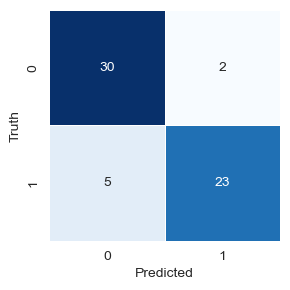

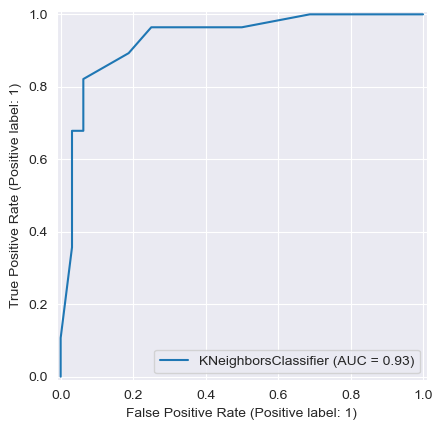

In [61]:
# A function to build base model.
# Acknowledgement: Code was referenced from Prof. Mafas Raheem's AML lab-8.
def build_and_validate_base_model(x_set, y_set, test_name):
    # Calls the evaluation helper module to Scale and do train/test split.
    x_train, x_test, y_train, y_test = ev.scale_and_split(x_set, y_set)

    print(f'\nEvaluation name: {test_name}.')

    # Train the model with training set.
    knn= KNeighborsClassifier(n_neighbors=13)
    knn.fit(x_train, y_train)

    # Display the best hyperparameters and score.
    print(f'Params         :{ knn.get_params()}.')

    # Do prediction with the train model.
    y_pred = knn.predict(x_test)

    # Calls the evaluation helper module to display classification-report, confusion-matrix and ROC curve
    ev.display_validation_report(y_test, y_pred, x_test, knn, test_name)

build_and_validate_base_model(X, y, ev.EvaluationType.std_base)

In [ ]:
train_scores

In [ ]:
# Evaluation: Standard Random Search CV
build_and_validate_with_random_search_cv(X, y, ev.EvaluationType.std_random_search_cv)

In [ ]:
print(ev.accuracies)

## Evaluation with Over-sampled Dataset

### Data Preparation and Over-sampling

In [ ]:
# Prepare features and target variables.
X = data.drop(uci.UCIHeartDiseaseData.target, axis=1)
y = data[uci.UCIHeartDiseaseData.target]

# Perform over-sampling with SMOTE
X_b, y_b = SMOTE().fit_resample(X, y)
print(f'Classes before over-sampling :{Counter(data[uci.UCIHeartDiseaseData.target])}.')
print(f'Classes after over-sampling  :{Counter(y_b)}.')

In [ ]:
# Before over-sampling
plt.subplots(figsize=(5,5))
sns.countplot(x=data[uci.UCIHeartDiseaseData.target])

# After over-sampling
plt.subplots(figsize=(5,5))
sns.countplot(x=y_b)

In [ ]:
# Evaluation: Over-sampled Base
build_and_validate_base_model(X_b, y_b,ev.EvaluationType.os_base)

In [ ]:
# Evaluation: Over-sampled Grid Search CV
find_optimal_neighbour(X_b, y_b, ev.EvaluationType.os_grid_search_cv)

In [ ]:
# Evaluation: Over-sampled Random Search CV
build_and_validate_with_random_search_cv(X_b, y_b, ev.EvaluationType.os_random_search_cv)

In [ ]:
print(ev.accuracies)

## Conclusion

In [ ]:
plt.bar(range(len(ev.accuracies)), list(ev.accuracies.values()), align='center')
plt.xticks(range(len(ev.accuracies)), list(ev.accuracies.keys()))

plt.show()

In [ ]:
### Register the highest in global
ev.global_accuracies['SVM'] = 87